In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
home = "../.."
images_dir = os.path.join(home, "static/images/")
plt.rcParams['figure.figsize'] = [5, 5]

/var/folders/b2/jb3gxb8n1wj854vrch7743s9dh1j82/T/ipykernel_15880/3481591475.py:2: RuntimeWarning: invalid value encountered in log2
  log_x = np.log2(x) + 2


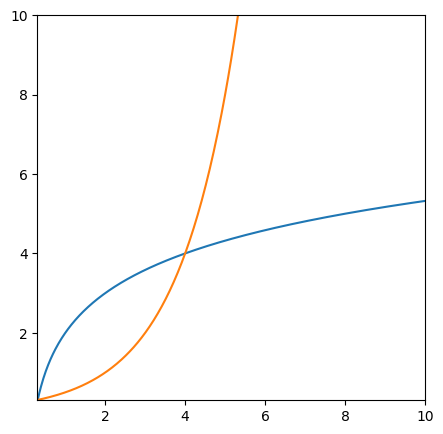

In [3]:
x = np.linspace(-10, 10, 1000)
log_x = np.log2(x) + 2
x_pow_e = np.exp2(x - 2)
plt.plot(x, log_x)
plt.plot(x, x_pow_e)
plt.xlim((.3, 10))
plt.ylim((.3, 10))
plt.savefig(os.path.join(images_dir, "log_vs_exponential_returns.png"))

## Refactoring Example

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


def load_df():
    df = pd.read_csv('../data/titanic_dataset.csv')
    df["is_male"] = df["Sex"] == "male"
    return df


def evaluate_adaboost_model(data):
    X = data[["is_male", "SibSp", "Pclass", "Fare"]]
    y = data['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = AdaBoostClassifier()
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    return accuracy


def evaluate_random_forest_model(data):
    X = data[["is_male", "SibSp", "Pclass", "Fare"]]
    y = data['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    return accuracy

df = load_df()

accuracy_xgboost = evaluate_xgboost_model(df)
print(f"XGBoost Accuracy: {accuracy_xgboost:.3f}")

accuracy_random_forest = evaluate_random_forest_model(df)
print(f"Random Forest Accuracy: {accuracy_random_forest:.3f}")

XGBoost Accuracy: 0.788
Random Forest Accuracy: 0.799


### First Refactor: Fixing Duplicated Code by Pulling Up a Method

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


def load_df():
    df = pd.read_csv('../data/titanic_dataset.csv')
    df["is_male"] = df["Sex"] == "male"
    return df


def evaluate_model(data, model_constructor):
    X = data[["is_male", "SibSp", "Pclass", "Fare"]]
    y = data['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = model_constructor()
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    return accuracy


df = load_df()

accuracy_xgboost = evaluate_model(df, AdaBoostClassifier)
print(f"XGBoost Accuracy: {accuracy_xgboost:.3f}")

accuracy_random_forest = evaluate_model(df, RandomForestClassifier)
print(f"Random Forest Accuracy: {accuracy_random_forest:.3f}")

XGBoost Accuracy: 0.788
Random Forest Accuracy: 0.799


### Second Refactor: Fixing a Mysterious Name by Renaming the Variable

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


def load_titanic_passengers_df():
    titanic_passengers_df = pd.read_csv('../data/titanic_dataset.csv')
    titanic_passengers_df["is_male"] = titanic_passengers_df["Sex"] == "male"
    return titanic_passengers_df


def evaluate_model(data, model_constructor):
    X = data[["is_male", "SibSp", "Pclass", "Fare"]]
    y = data['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    model = model_constructor()
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    return accuracy


titanic_passengers_df = load_df()

accuracy_xgboost = evaluate_model(titanic_passengers_df, AdaBoostClassifier)
print(f"XGBoost Accuracy: {accuracy_xgboost:.3f}")

accuracy_random_forest = evaluate_model(titanic_passengers_df, RandomForestClassifier)
print(f"Random Forest Accuracy: {accuracy_random_forest:.3f}")

XGBoost Accuracy: 0.788
Random Forest Accuracy: 0.804


### Third Refactor: Fix Magic Values by Extracting Variables

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier


MODEL_FEATURES = ["is_male", "SibSp", "Pclass", "Fare"]
MODEL_TARGET = "Survived"
TRAIN_TEST_SPLIT_FRACTION = 0.2


def load_titanic_passengers_df():
    titanic_passengers_df = pd.read_csv('../data/titanic_dataset.csv')
    titanic_passengers_df["is_male"] = titanic_passengers_df["Sex"] == "male"
    return titanic_passengers_df


def evaluate_model(data, model_constructor):
    X = data[MODEL_FEATURES]
    y = data[MODEL_TARGET]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TRAIN_TEST_SPLIT_FRACTION)
    
    model = model_constructor()
    model.fit(X_train, y_train)
    
    accuracy = model.score(X_test, y_test)
    return accuracy


titanic_passengers_df = load_df()

accuracy_xgboost = evaluate_model(titanic_passengers_df, AdaBoostClassifier)
print(f"XGBoost Accuracy: {accuracy_xgboost:.3f}")

accuracy_random_forest = evaluate_model(titanic_passengers_df, RandomForestClassifier)
print(f"Random Forest Accuracy: {accuracy_random_forest:.3f}")

XGBoost Accuracy: 0.788
Random Forest Accuracy: 0.799
